In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('data/train.csv')

In [ ]:
df.건물번호.unique()

In [ ]:
df.columns

In [ ]:
from pandas import read_csv
series = read_csv('data/train.csv', parse_dates=True, squeeze=True)
series = series.loc[series.건물번호 == 1]

In [ ]:
series.head()

In [ ]:
series.columns

In [ ]:
series = series.drop(['num_date_time','건물번호','일시','기온(C)','강수량(mm)','풍속(m/s)','습도(%)','일조(hr)','일사(MJ/m2)'], axis=1)

In [6]:
# https://dacon.io/competitions/official/235736/codeshare/2844?page=1&dtype=recent

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
import seaborn as sns;

train = pd.read_csv('data/train.csv')

train_ = train.copy().dropna()

def make_train_nan(col, n):
    new_list = []
    for idx, temp in enumerate(train_[col]):
        if idx%n==0:
            new_list.append(temp)
        else:
            new_list.append(np.nan)
    train_['{}'.format(col+'_nan')] = new_list


make_train_nan('풍속(m/s)',3)
make_train_nan('습도(%)',3)

In [7]:
print(train_.iloc[:,-2:].isnull().sum())

풍속(m/s)_nan    17592
습도(%)_nan      17592
dtype: int64


In [8]:
def compare_interpolate_methods(col, methods, metric):
    error_dict = dict()
    for method in methods:
        fillna = train_['{}'.format(col+'_nan')].interpolate(method=method)
        if fillna.isna().sum() != 0:
            fillna = fillna.interpolate(method='linear')
        error = metric(train_['{}'.format(col)], fillna)
        error_dict['{}'.format(method)] = error
    
    return error_dict

pad 풍속(m/s)
26388 26388
linear 풍속(m/s)
26388 26388
quadratic 풍속(m/s)
26388 26388
cubic 풍속(m/s)
26388 26388
pad 습도(%)
26388 26388
linear 습도(%)
26388 26388
quadratic 습도(%)
26388 26388
cubic 습도(%)
26388 26388


c:\Users\qja19\Anaconda3\envs\co2\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from current font.
  func(*args, **kwargs)
c:\Users\qja19\Anaconda3\envs\co2\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  func(*args, **kwargs)
c:\Users\qja19\Anaconda3\envs\co2\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from current font.
  func(*args, **kwargs)
c:\Users\qja19\Anaconda3\envs\co2\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
c:\Users\qja19\Anaconda3\envs\co2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\qja19\Anaconda3\envs\co2\lib\site-packages\IPython\core\pylab

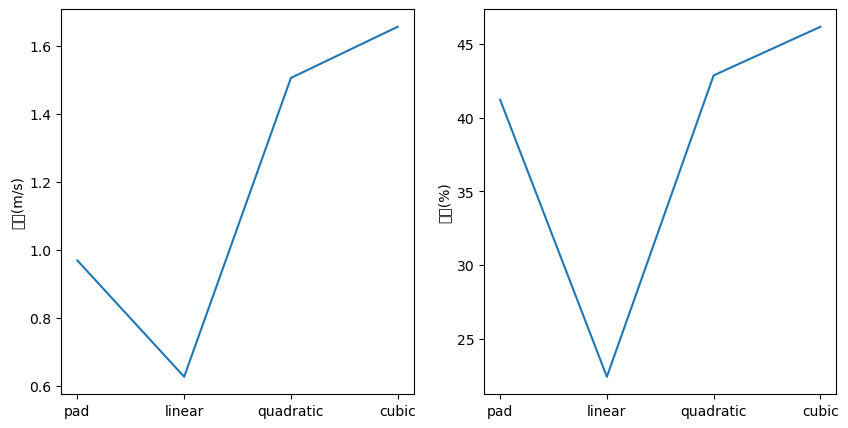

In [11]:
all_cols_error_dict = dict()
for col in ['풍속(m/s)', '습도(%)']:
    methods = ['pad','linear','quadratic','cubic']
    error_dict = compare_interpolate_methods(col, methods, mean_squared_error)
    all_cols_error_dict['{}'.format(col)] = error_dict
    
all_cols_error_df = pd.DataFrame(all_cols_error_dict)

fig, axes = plt.subplots(1,2, figsize = (10,5), sharey=False)
for i in range(len(all_cols_error_df.columns)):
    sns.lineplot(ax=axes[i], data=all_cols_error_df.iloc[:,i].transpose())

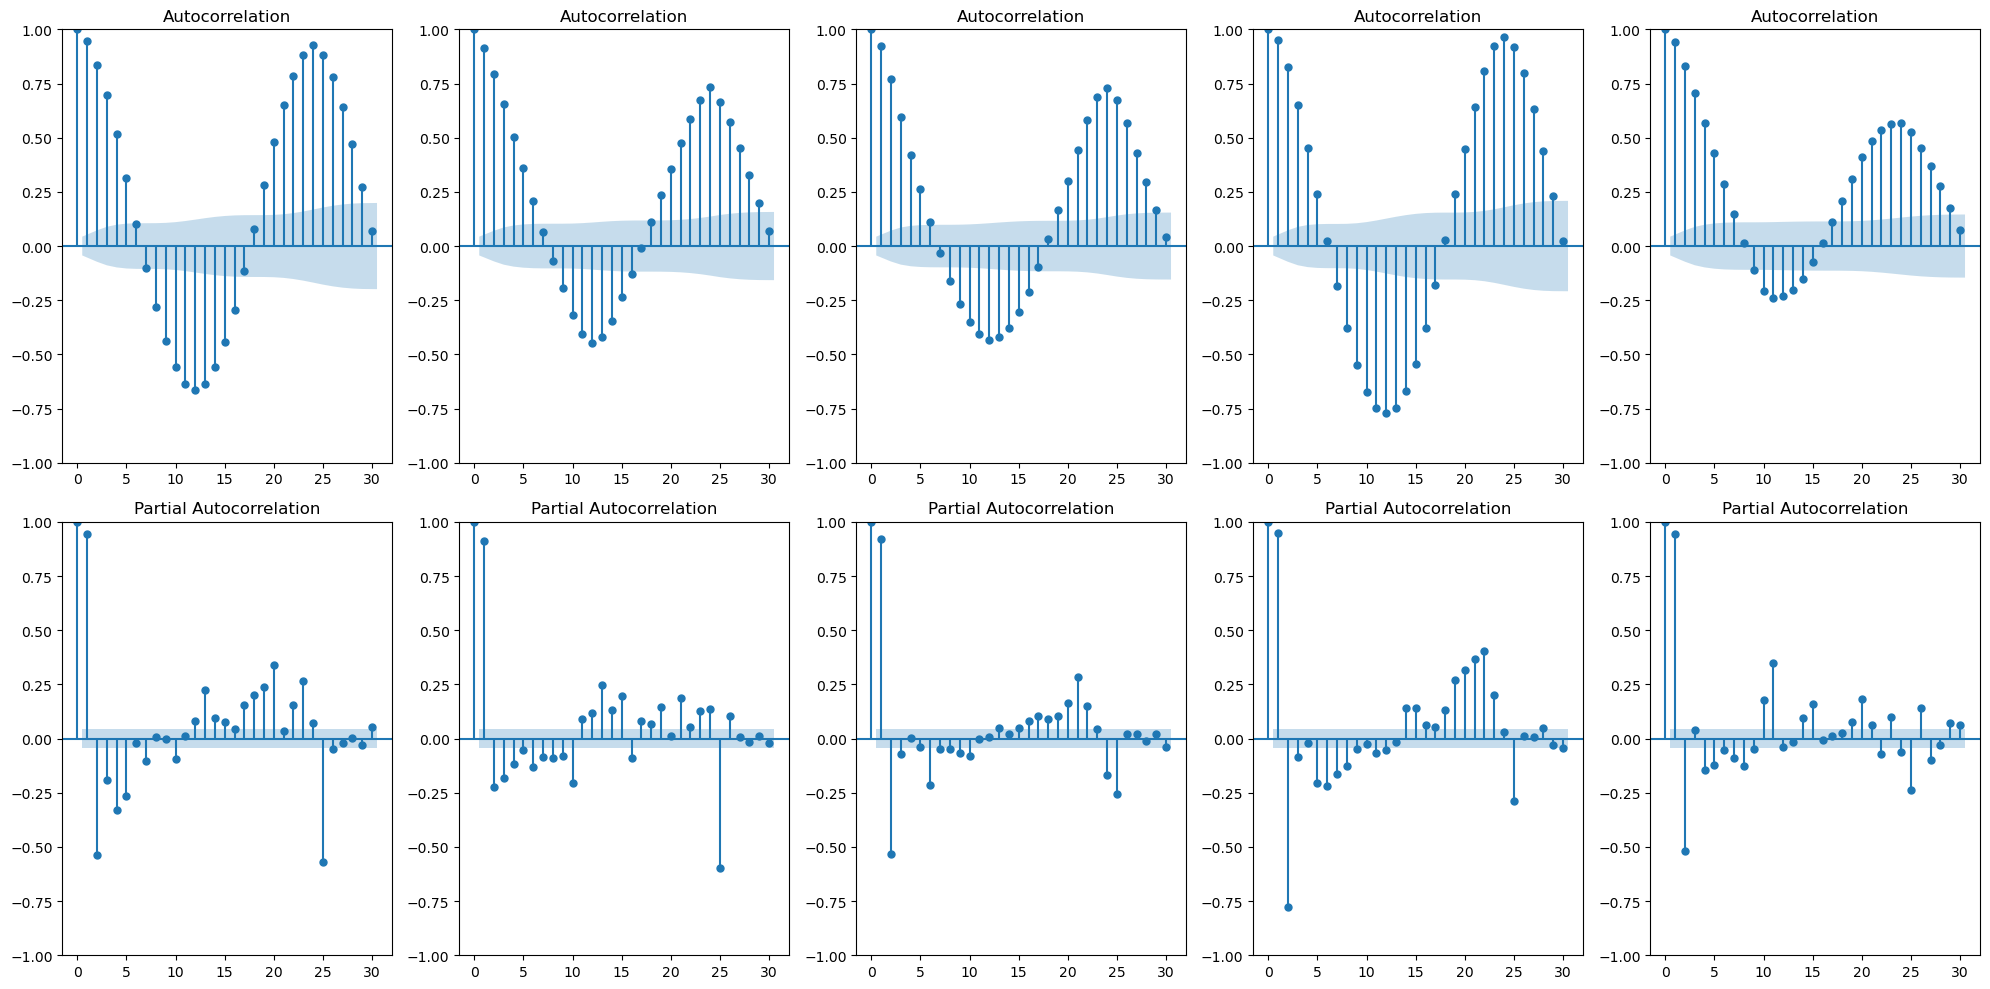

In [37]:
import statsmodels.graphics.tsaplots as sgt 
lags = 30
df = [train[train.건물번호==i] for i in range(1, 6)]
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
for i in range(5):
    sgt.plot_acf(df[i]['전력소비량(kWh)'], lags=lags, ax=axs[0][i])
    sgt.plot_pacf(df[i]['전력소비량(kWh)'], method = ('ols'), lags=lags, ax=axs[1][i])
plt.tight_layout()
plt.show()

# 24시간 전까지 사용